**Index**

[Preliminary Data Stuff](#data_stuff) <br>
[Data Plan](#assumptions) <br>


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
%matplotlib inline
from datetime import datetime 

In [11]:
## Team Data
team_data = pd.read_csv('raw_data/MDataFiles_Stage1/MTeams.csv')
team_data.sample(10)


,TeamID,TeamName,FirstD1Season,LastD1Season
351,1452,West Virginia,1985,2020
365,1466,North Alabama,2019,2020
271,1372,SF Austin,1987,2020
22,1123,Ball St,1985,2020
224,1325,Ohio,1985,2020
116,1217,Harvard,1985,2020
248,1349,Rice,1985,2020
8,1109,Alliant Intl,1985,1991
48,1149,Charleston So,1985,2020
58,1159,Colgate,1985,2020


In [12]:
## Massey Data - his file lists out rankings (e.g. #1, #2, #3, ..., #N) 
# of teams going back to the 2002-2003 season, 
# under a large number of different ranking system methodologies. 
massey_data = pd.read_csv('raw_data/MDataFiles_Stage1/MMasseyOrdinals.csv')
massey_data.sample(10)

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
531138,2006,133,DOL,1339,191
3370292,2018,100,HAS,1439,47
2359071,2015,51,BWE,1188,326
343579,2005,93,WOB,1210,34
2491847,2015,100,STS,1394,236
3007426,2017,79,FMG,1186,171
748631,2008,85,KRA,1208,75
3139222,2017,121,KPK,1226,330
2787509,2016,107,DOL,1122,245
2414280,2015,72,SPW,1191,66


In [13]:
## Seed Data - This file identifies the seeds for all teams in each NCAA® tournament, 
# for all seasons of historical data. Thus, there are between 64-68 rows for each year,
# depending on whether there were any play-in games and how many there were.
seed_data = pd.read_csv('raw_data/MDataFiles_Stage1/MNCAATourneySeeds.csv')
seed_data.sample(10)

,Season,Seed,TeamID
802,1997,Y03,1153
678,1995,Y07,1393
1605,2009,Z13,1280
1,1985,W02,1210
61,1985,Z14,1325
1261,2004,Y11,1350
1886,2014,W09,1203
1556,2009,W13,1340
95,1986,X16,1299
1145,2002,Z08,1417


In [14]:

## number of times seeded in the last 5 years  (avg)
## last year seed
## max seed last 5 years

seed_data['Seedless'] = seed_data['Seed'].apply(lambda x: x[1:3])
seed_data['Seedless'] = pd.to_numeric(seed_data['Seedless'])
seed_data['Last Seed'] =  seed_data.groupby('TeamID')['Seedless'].shift(1)
seed_data['Max Seed 5Y'] = seed_data.groupby('TeamID')['Seedless'].transform(lambda x: x.rolling(5, min_periods=1).max())
seed_data['Avg Seed 5Y'] = seed_data.groupby('TeamID')['Seedless'].transform(lambda x: x.rolling(5, min_periods=1).mean())
seed_data['Avg Seed 5Y Weighted'] = seed_data.groupby('TeamID')['Seedless'].transform(lambda x: x.rolling(5, min_periods=1, win_type='triang').mean())
seed_data.drop(['Seedless'], axis=1, inplace=True)

seed_data.loc[seed_data['TeamID'] == 1437]


,Season,Seed,TeamID,Last Seed,Max Seed 5Y,Avg Seed 5Y,Avg Seed 5Y Weighted
55,1985,Z08,1437,NaN,8,8.0,8.000000
105,1986,Y10,1437,8.0,10,9.0,8.666667
229,1988,Y06,1437,10.0,10,8.0,8.333333
363,1990,Y12,1437,6.0,12,9.0,8.750000
392,1991,W09,1437,12.0,12,9.0,8.777778
642,1995,W03,1437,9.0,12,8.0,8.777778
722,1996,X03,1437,3.0,12,6.6,7.333333
771,1997,W04,1437,3.0,12,6.2,5.444444
919,1999,X08,1437,4.0,9,5.4,4.444444
1336,2005,Z05,1437,8.0,8,4.6,4.666667



One row per team per season
| Season | Team_ID |

- Seed Data
- Rank data
- Regular season data 
- Coach
- Previous Tournament Data
    - Wins previous tournaments, placed last tournament,\

Validation Table
One row per matchup per season - NCAA
| Season | Team_ID_Low | Team_ID_High | Outcome (1,0)|

<a id='assumptions'></a>
#### Data Plan


In [16]:
### Prediction Data set 
## T1 T2 input_variables 
## T1 T2 output_probability
## 1 - if the team with the lower team # wins
## 0 - if the team with the lower team # loses
## output_probability = prob(1) = probability that the team with lower team number wins
### Lowerteamid_Higherteamid_yr: P(Lowerteamid wins)

In [17]:
# Preliminary model
validation_data = pd.read_csv('cleaned_data/validation_dataset.csv')
validation_data.head()

,Unnamed: 0,Season,Team_ID_L,Team_ID_H,Outcome
0,0,1985,1116,1234,1
1,1,1985,1120,1345,1
2,2,1985,1207,1250,1
3,3,1985,1229,1425,1
4,4,1985,1242,1325,1


In [25]:
temp_data = pd.merge(seed_data, validation_data, left_on=['Season', 'TeamID'], right_on=['Season', 'Team_ID_L'], how='inner')
prediction_data = pd.merge(seed_data, temp_data, left_on=['Season', 'TeamID'], right_on=['Season', 'Team_ID_H'], how='inner', suffixes=['_H', '_L'])
prediction_data.drop(['TeamID_H', 'TeamID_L', 'Unnamed: 0'], axis=1, inplace=True)
prediction_data.sample(10)

,Season,Seed_H,Last Seed_H,Max Seed 5Y_H,Avg Seed 5Y_H,Avg Seed 5Y Weighted_H,Seed_L,Last Seed_L,Max Seed 5Y_L,Avg Seed 5Y_L,Avg Seed 5Y Weighted_L,Team_ID_L,Team_ID_H,Outcome
1065,2001,Z10,10.0,12,9.800000,9.333333,Z07,5.0,13,8.333333,9.333333,1336,1344,1
947,2000,W03,9.0,9,5.600000,6.333333,W05,6.0,10,6.200000,6.666667,1196,1329,1
687,1995,Z11,9.0,14,10.800000,10.777778,Z06,9.0,9,6.400000,6.777778,1207,1462,1
535,1993,X16,NaN,16,16.000000,16.000000,X01,2.0,8,3.000000,3.222222,1231,1460,1
1055,2001,Y16b,14.0,16,15.333333,15.333333,Y16a,NaN,16,16.000000,16.000000,1322,1457,1
2057,2017,W07,10.0,12,6.800000,5.777778,W10,3.0,11,6.600000,5.888889,1266,1376,0
437,1991,Z09,8.0,9,8.000000,7.666667,Z08,3.0,8,4.200000,3.777778,1207,1435,1
2008,2016,X05,9.0,10,6.200000,7.000000,X12,16.0,16,14.200000,14.666667,1114,1345,1
1048,2001,Y06,10.0,10,8.000000,8.666667,Y03,9.0,9,6.000000,6.125000,1279,1323,1
1197,2003,Z13,9.0,14,11.000000,11.111111,Z04,4.0,5,3.600000,3.111111,1228,1443,1


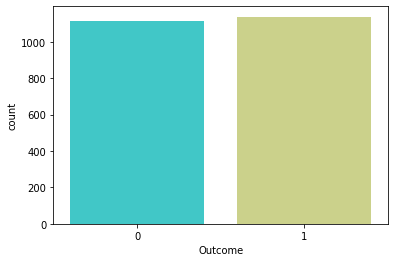

In [29]:
sns.countplot(x='Outcome',data=prediction_data,palette='rainbow')

In [37]:
from sklearn.model_selection import train_test_split
X = prediction_data.drop(['Outcome', 'Team_ID_L', 'Team_ID_H', 'Seed_H','Seed_L', 'Season'], axis=1)
X = X.fillna(0)
y = prediction_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [74]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=3)

In [75]:
## Build our dtree
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [76]:
dt_predictions = dtree.predict(X_test)
dt_predictions_proba = dtree.predict_proba(X_test)

In [77]:
from sklearn.metrics import log_loss, accuracy_score, classification_report

In [78]:
print(classification_report(y_test,dt_predictions))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       323
           1       0.71      0.68      0.70       353

    accuracy                           0.69       676
   macro avg       0.69      0.69      0.69       676
weighted avg       0.69      0.69      0.69       676



In [79]:
print(log_loss(y_test,dt_predictions_proba))

0.573141926424562


In [80]:
dt_predictions_proba

array([[0.67896679, 0.32103321],
       [0.34782609, 0.65217391],
       [0.34782609, 0.65217391],
       ...,
       [0.67896679, 0.32103321],
       [0.56862745, 0.43137255],
       [0.95454545, 0.04545455]])

In [81]:
## Let's take a look at our tree and see what's coming up as predictive
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X.columns[:])
features

['Last Seed_H',
 'Max Seed 5Y_H',
 'Avg Seed 5Y_H',
 'Avg Seed 5Y Weighted_H',
 'Last Seed_L',
 'Max Seed 5Y_L',
 'Avg Seed 5Y_L',
 'Avg Seed 5Y Weighted_L']

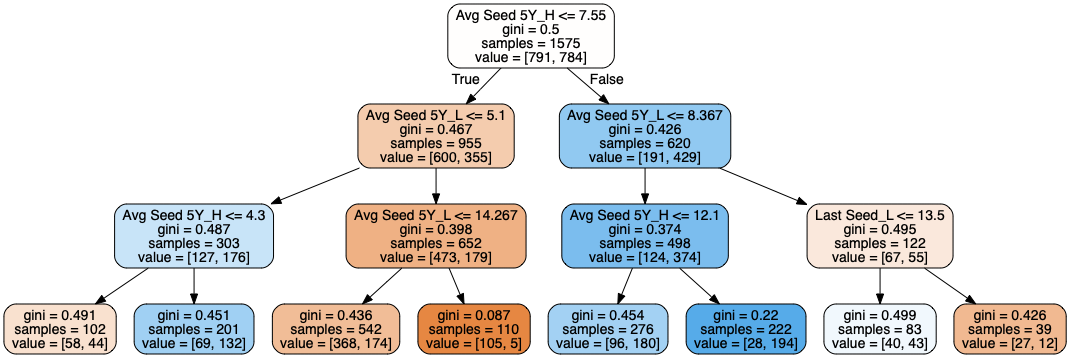

In [82]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

In [90]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [91]:
rfc_predictions = rfc.predict(X_test)
rfc_predictions_proba = rfc.predict_proba(X_test)

In [92]:
print(classification_report(y_test,rfc_predictions))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       323
           1       0.70      0.68      0.69       353

    accuracy                           0.68       676
   macro avg       0.68      0.68      0.68       676
weighted avg       0.68      0.68      0.68       676



In [93]:
print(log_loss(y_test,rfc_predictions_proba))

0.5737468361245116
